In [3]:
#importing all the necessary libraries
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
#implementation of the Decision Stump class
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

#implementation of the AdaBoost algorithm
class Adaboost_Implementation():
    #initializing the constructor
    def __init__(self, num_of_clf):
        self.num_of_clf = num_of_clf

    #method for fitting the data
    def fit(self, X, y):
        num_of_samples, num_of_features = np.shape(X)
        w = np.full(num_of_samples, (1 / num_of_samples))
        self.classifiers = []
        for _ in range(self.num_of_clf):
            classifier = DecisionStump()
            min_error = float('inf')
            for feature_i in range(num_of_features):
                feature_values = np.expand_dims(X[:, feature_i], axis = 1)
                unique_values = np.unique(feature_values)
                for threshold in unique_va
                    p = 1
                    prediction = np.ones(np.shape(y))
                    prediction[X[:, feature_i] < threshold] = -1
                    error = sum(w[y != prediction])
                    if error > 0.5:
                        error = 1 - error
                        p = -1
                    if error < min_error:
                        classifier.polarity = p
                        classifier.threshold = threshold
                        classifier.feature_index = feature_i
                        min_error = error
            classifier.alpha = 0.5 * math.log((1.0 - min_error) / (min_error + 1e-10))
            predictions = np.ones(np.shape(y))
            negative_idx = (classifier.polarity * X[:, classifier.feature_index] < classifier.polarity * classifier.threshold)
            predictions[negative_idx] = -1
            w *= np.exp(-classifier.alpha * y * predictions)
            w /= np.sum(w)
            self.classifiers.append(classifier)

    #method for predicting the label
    def predict(self, X):
        num_of_samples = np.shape(X)[0]
        y_pred = np.zeros((num_of_samples, 1))
        for classifier in self.classifiers:
            predictions = np.ones(np.shape(y_pred))
            negative_idx = (classifier.polarity * X[:, classifier.feature_index] < classifier.polarity * classifier.threshold)
            predictions[negative_idx] = -1
            y_pred += classifier.alpha * predictions
        y_pred = np.sign(y_pred).flatten()
        return y_pred

In [9]:
#getting train and test data from the text files
train_dataset = pd.read_csv("train.txt", header = None, index_col = False)
test_dataset = pd.read_csv("test.txt", header = None, index_col = False)

train_data = np.array(train_dataset)

#getting the features from the train data file
X = np.array(train_dataset.iloc[:,1:])
#getting the labels from train data file
y = np.array(train_dataset.iloc[:,0])
#getting the features from the test data file
X_test_set = np.array(test_dataset)

three = 3
five = 5

#changing the labels 3 --> -1 and 5 --> 1
y[y == three] = -1
y[y == five] = 1

#splitting the train data for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#list to store the train accuracies of the model from 10 to 250 weak classifiers with an increment of 10
train_accuracies = []

#training the model
for i in range(10,251,10):
    classifier = Adaboost_Implementation(num_of_clf = i)
    classifier.fit(X_train, y_train)
    y_pred = classifierpredict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracies.append(1 - accuracy)
    y_test_pred = classifier.predict(X_test_set)
    final = []
    for j in y_test_pred:
        if j == -1:
            final.append(3)
        elif j == 1:
            final.append(5)
    final_predictions = pd.DataFrame(final)
    #generating the result file for predicting the labels based on features available in the test data file
    file_name = "results" + str(i) + ".dat"
    final_predictions.to_csv(file_name, header = False, index = False)

#rounding off the accuracies for easy plotting of the graph
for i in range(len(train_accuracies)):
    train_accuracies[i] = round(train_accuracies[i], 2)

#implementing a single DecisionTreeClassifier 
classifier = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9547325102880658


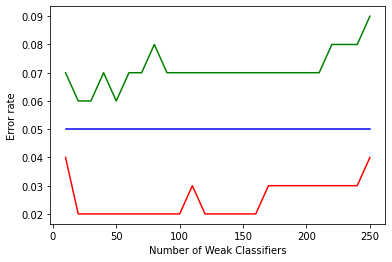

In [46]:
#plotting the graph
xpoints = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])
ypoints = np.array(train_accuracies)
ypoints1 = np.array([0.07, 0.06, 0.06, 0.07, 0.06, 0.07, 0.07, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.09])
library_accuracies = []
for i in range(25):
    library_accuracies.append(round(1 - acc, 2))
ypoints2 = np.array(library_accuracies)

plt.plot(xpoints, ypoints, color = 'r', label = 'train error')
plt.plot(xpoints, ypoints1, color = 'g', label = 'test error')
plt.plot(xpoints, ypoints2, color = 'b', label = 'sklearn error')

plt.xlabel("Number of Weak Classifiers")
plt.ylabel("Error rate")
plt.show()